Aviation is one of my biggest passions. I tried to follow it by applying to flight school but I couldn't get in. Since then, I've also found a deep interest for Data Science. This notebook combines the two. I wasn't trying to solve any specific problem, I just wanted to mess around with the DOMESTIC dataset I acquired from the Bureau of Transportation Statistics because I'm curious about the numbers. I've tried to apply various Data Analysis and Data Science techniques to see how much I can extract from this dataset. Anyways, this is no official project, it's just a slice of my curious mind. Enjoy!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = 'T_T100D_MARKET_ALL_CARRIER.csv' #input your own file path here. I got the dataset for US domestic travel from USDOT.
data = pd.read_csv(file_path)

print(data.head())

   PASSENGERS  DISTANCE UNIQUE_CARRIER                 UNIQUE_CARRIER_NAME  \
0         0.0       0.0            27Q  Jet Aviation Flight Services, Inc.   
1         0.0       0.0            27Q  Jet Aviation Flight Services, Inc.   
2         0.0       0.0            27Q  Jet Aviation Flight Services, Inc.   
3         0.0       0.0            2LQ            Tropic Ocean Airways LLC   
4         0.0       0.0            2LQ            Tropic Ocean Airways LLC   

  CARRIER                        CARRIER_NAME  ORIGIN_AIRPORT_ID ORIGIN  \
0     27Q  Jet Aviation Flight Services, Inc.              15167    TEB   
1     27Q  Jet Aviation Flight Services, Inc.              15167    TEB   
2     27Q  Jet Aviation Flight Services, Inc.              15447    UGN   
3     2LQ            Tropic Ocean Airways LLC              11697    FLL   
4     2LQ            Tropic Ocean Airways LLC              16541    OBE   

      ORIGIN_CITY_NAME ORIGIN_STATE_ABR  DEST_AIRPORT_ID DEST  \
0        Teterb

In [3]:
data.describe()

,PASSENGERS,DISTANCE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,YEAR,QUARTER,MONTH
count,185121.000000,185121.000000,185121.000000,185121.000000,185121.0,185121.000000,185121.000000
mean,3463.818789,801.097995,12785.726687,12777.386061,2024.0,1.999352,5.000346
std,6828.892748,669.697553,1594.651827,1593.343062,0.0,0.819688,2.587582
min,0.000000,0.000000,10001.000000,10001.000000,2024.0,1.000000,1.000000
25%,6.000000,292.000000,11292.000000,11292.000000,2024.0,1.000000,3.000000
50%,585.000000,643.000000,12892.000000,12892.000000,2024.0,2.000000,5.000000
75%,3966.000000,1090.000000,14107.000000,14107.000000,2024.0,3.000000,7.000000
max,98536.000000,7360.000000,17054.000000,17054.000000,2024.0,3.000000,9.000000


In [4]:
list(data.columns)

['PASSENGERS',
 'DISTANCE',
 'UNIQUE_CARRIER',
 'UNIQUE_CARRIER_NAME',
 'CARRIER',
 'CARRIER_NAME',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'DEST_AIRPORT_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'YEAR',
 'QUARTER',
 'MONTH']

In [5]:
columns_to_keep = ['PASSENGERS', 'DISTANCE', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST', 'DEST_CITY_NAME','CARRIER_NAME','YEAR', 'QUARTER', 'MONTH']
columns_to_drop = ['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID','ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'CARRIER']

#Dropping the columns I don't need
data_cleaned = data.drop(columns=columns_to_drop)

#Keeping the columns I want
data_cleaned = data_cleaned[columns_to_keep]

print(data_cleaned.head())


   PASSENGERS  DISTANCE ORIGIN     ORIGIN_CITY_NAME DEST       DEST_CITY_NAME  \
0         0.0       0.0    TEB        Teterboro, NJ  TEB        Teterboro, NJ   
1         0.0       0.0    TEB        Teterboro, NJ  TEB        Teterboro, NJ   
2         0.0       0.0    UGN         Waukegan, IL  UGN         Waukegan, IL   
3         0.0       0.0    FLL  Fort Lauderdale, FL  FLL  Fort Lauderdale, FL   
4         0.0       0.0    OBE       Okeechobee, FL  OBE       Okeechobee, FL   

                         CARRIER_NAME  YEAR  QUARTER  MONTH  
0  Jet Aviation Flight Services, Inc.  2024        3      7  
1  Jet Aviation Flight Services, Inc.  2024        3      9  
2  Jet Aviation Flight Services, Inc.  2024        2      4  
3            Tropic Ocean Airways LLC  2024        2      6  
4            Tropic Ocean Airways LLC  2024        2      6  


In [6]:
#A check to see if there are missing values in the dataset
missing_data = data_cleaned.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [7]:
#Remove rows where passenger count is 0
data_cleaned = data_cleaned[data_cleaned['PASSENGERS'] > 0]

#Show me the number of rows with actual passengers
print(f"Rows after removal: {data_cleaned.shape[0]}")


Rows after removal: 154840


In [8]:
# Summary statistics
print(data_cleaned.describe())

          PASSENGERS       DISTANCE      YEAR        QUARTER          MONTH
count  154840.000000  154840.000000  154840.0  154840.000000  154840.000000
mean     4141.214144     818.078714    2024.0       1.999832       5.003507
std      7276.566941     651.225156       0.0       0.819040       2.589324
min         1.000000       0.000000    2024.0       1.000000       1.000000
25%        67.000000     323.000000    2024.0       1.000000       3.000000
50%      1401.000000     674.000000    2024.0       2.000000       5.000000
75%      4716.000000    1107.000000    2024.0       3.000000       7.000000
max     98536.000000    5136.000000    2024.0       3.000000       9.000000


In [10]:
print(data_cleaned.columns) #Sanity Check

Index(['PASSENGERS', 'DISTANCE', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST',
       'DEST_CITY_NAME', 'CARRIER_NAME', 'YEAR', 'QUARTER', 'MONTH'],
      dtype='object')


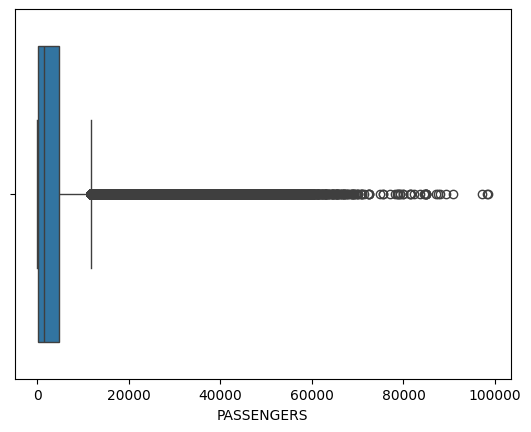

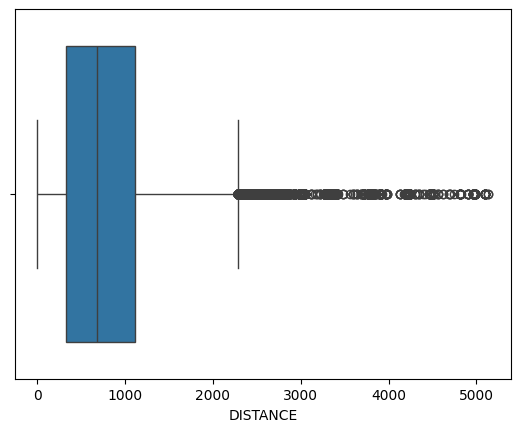

In [11]:
# Visualize potential outliers in numeric columns like PASSENGERS and DISTANCE
sns.boxplot(x=data_cleaned['PASSENGERS'])
plt.show()

sns.boxplot(x=data_cleaned['DISTANCE'])
plt.show()

In the boxplots above, we can see that there are several outliers while the box itself is closer to zero. This makes sense as the dataset came with total passengers for each of the 15,800 average flights from Jan-Sep in 2024. I did this just to see what it would look like, and boy, it looks pretty cool. It does tell me that with all the outliers, using it for predictions would be a more challenging task than usual. Should be fun!

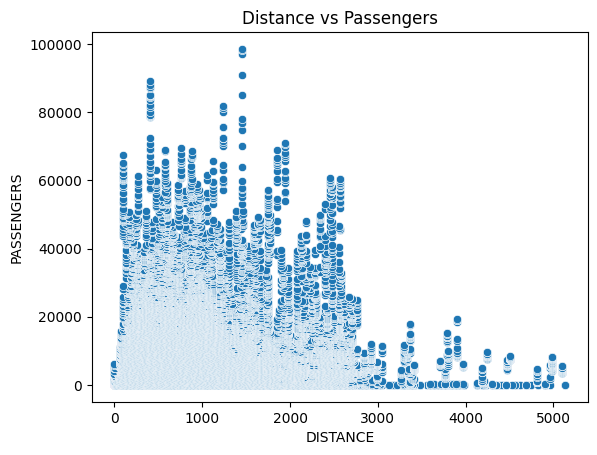

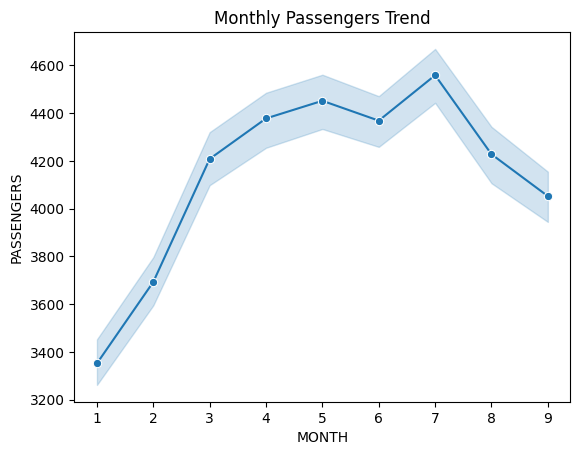

In [12]:
#Scatter plot to see relationship between distance and passengers
sns.scatterplot(x=data_cleaned['DISTANCE'], y=data_cleaned['PASSENGERS'])
plt.title('Distance vs Passengers')
plt.show()

#Line plot to analyze seasonal trends
sns.lineplot(x='MONTH', y='PASSENGERS', data=data_cleaned, marker='o')
plt.title('Monthly Passengers Trend')
plt.show()


I can see that most of the passengers flew below the 2800 mile mark (Roughly across the continent) while the average seems to be around the 2000 mile mark. Likewise, in the line chart, I can see that May and July recorded the most travel while the curve in general peaked during the summer travel season.

In [13]:
import plotly.graph_objects as go

top_airports = data_cleaned.groupby('ORIGIN')['PASSENGERS'].sum().sort_values(ascending=False).head(15)

#Create a bar plot
fig = go.Figure(data=[go.Bar(
    x=top_airports.index,
    y=top_airports.values,
    marker_color='orange',
    marker_line_color='black',
    hovertemplate='<b>Airport:</b> %{x}<br><b>Passengers:</b> %{y:,}<extra></extra>'
)])

#Customize layout
fig.update_layout(
    title='Top 15 Airports by Passenger Count',
    xaxis_title='Origin Airport',
    yaxis_title='Total Passengers',
    template='plotly',
    xaxis_tickangle=-45,
    margin={'t': 50, 'r': 10, 'b': 40, 'l': 50},
)

#Show
fig.show()

No surprise that Atlanta, the mega hub for Delta Airlines came in first for origin passengers, while United and American's biggest hubs, Denver and Dallas came in second and third! Hover over the bars for insights!

In [14]:
import pandas as pd
import plotly.express as px

#Group by origin and destination pairs and calculate total flights and passengers
airport_pairs = data_cleaned.groupby(['ORIGIN', 'DEST']).agg(
    total_flights=('PASSENGERS', 'count'),  #Each row corresponds to data for flights between the route.
    total_passengers=('PASSENGERS', 'sum')
).reset_index()

#Find the top pairs by total passengers
top_passenger_pairs = airport_pairs.sort_values(by='total_passengers', ascending=False).head(10)
top_passenger_pairs['Airport Pair'] = top_passenger_pairs['ORIGIN'] + " - " + top_passenger_pairs['DEST']

#Find the top pairs by total flights
top_flight_pairs = airport_pairs.sort_values(by='total_flights', ascending=False).head(10)
top_flight_pairs['Airport Pair'] = top_flight_pairs['ORIGIN'] + " - " + top_flight_pairs['DEST']

#Show Top 10 Airport Pairs by Total Passengers
fig_passengers = px.bar(
    top_passenger_pairs,
    x='Airport Pair',
    y='total_passengers',
    title='Top 10 Airport Pairs by Total Passengers',
    labels={'total_passengers': 'Total Passengers'},
    hover_data=['total_passengers'],
    text='total_passengers'
)
fig_passengers.update_traces(texttemplate='%{text}', textposition='outside')
fig_passengers.update_layout(
    xaxis_title='Airport Pair',
    yaxis_title='Total Passengers',
    xaxis_tickangle=45,
    height=500,
    width=800
)
fig_passengers.show()

#Show Top 10 Airport Pairs by Total Flights
fig_flights = px.bar(
    top_flight_pairs,
    x='Airport Pair',
    y='total_flights',
    title='Top 10 Airport Pairs by Total Flights',
    labels={'total_flights': 'Total Flights'},
    hover_data=['total_flights'],
    text='total_flights'
)
fig_flights.update_traces(texttemplate='%{text}', textposition='outside')
fig_flights.update_layout(
    xaxis_title='Airport Pair',
    yaxis_title='Total Flights',
    xaxis_tickangle=45,
    height=500,
    width=800
)
fig_flights.show()

In the above bar charts, we can clearly see that Atlanta and Orlando have the most passengers in 2024, while Los Angeles and New York City come a close second. Just thought it would be cool to see this stuff and explore the busiest commercial routes in the US airspace network!

In [15]:
#Find passenger counts for origin and destination
origin_passengers = data_cleaned.groupby('ORIGIN')['PASSENGERS'].sum()
dest_passengers = data_cleaned.groupby('DEST')['PASSENGERS'].sum()

#Combine both into a single series
total_passengers = origin_passengers.add(dest_passengers, fill_value=0)

#Sort to find the top 5 busiest airports
top_airports = total_passengers.sort_values(ascending=False).head(5).reset_index()
top_airports.columns = ['Airport', 'Total Passengers']

#Plot Top 5 Busiest Airports by Total Passengers
fig = px.bar(
    top_airports,
    x='Airport',
    y='Total Passengers',
    title='Top 5 Busiest Airports by Total Passengers',
    labels={'Total Passengers': 'Total Passengers'},
    hover_data=['Total Passengers'],
    text='Total Passengers'
)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    xaxis_title='Airport',
    yaxis_title='Total Passengers',
    xaxis_tickangle=45,
    height=500,
    width=800
)
fig.show()

Again, Atlanta, Denver and Dallas. The big three for Delta, United and American respectively. Hover over for insights!

In [16]:
import folium

#Lat and Long for top five airports
airport_locations = {
    'ATL': {'lat': 33.6407, 'lon': -84.4277},
    'ORD': {'lat': 41.9742, 'lon': -87.9073},
    'DFW': {'lat': 32.8998, 'lon': -97.0403},
    'DEN': {'lat': 39.8561, 'lon': -104.6737},
    'CLT': {'lat': 35.214, 'lon': -80.9431}
}

#Get total_passengers data is available
top_airports = total_passengers.sort_values(ascending=False).head(5)

#Create map
map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

#Add markers
for airport, passengers in top_airports.items():
    if airport in airport_locations:
        lat = airport_locations[airport]['lat']
        lon = airport_locations[airport]['lon']
        folium.Marker(
            location=[lat, lon],
            popup=f"{airport}: {int(passengers):,} passengers",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(map)
    else:
        print(f"Missing location data for {airport}")

#Show
map


A map of the US with it's five busiest airports. Hover over for insights!

In [17]:
pip install geopy

In [18]:
import folium
from geopy.geocoders import Nominatim

#Initialize geolocator to fetch latitude/longitude for an airport
geolocator = Nominatim(user_agent="airport_locator")

#latitude/longitude data for airports
airport_locations = {
    'ATL': {'lat': 33.6407, 'lon': -84.4277},
    'ORD': {'lat': 41.9742, 'lon': -87.9073},
    'DFW': {'lat': 32.8998, 'lon': -97.0403},
    'DEN': {'lat': 39.8561, 'lon': -104.6737},
    'CLT': {'lat': 35.214, 'lon': -80.9431},
}

#Function to get latitude and longitude from airport code
def get_airport_location(airport_code):
    if airport_code in airport_locations:
        return airport_locations[airport_code]
    else:
        location = geolocator.geocode(f"{airport_code} airport")
        if location:
            return {'lat': location.latitude, 'lon': location.longitude}
        else:
            print(f"Could not find coordinates for {airport_code}")
            return None

airport_busiest_dest = {}

for airport in top_airports.index:
    #Filter records for each origin airport
    origin_data = data_cleaned[data_cleaned['ORIGIN'] == airport]

    #Group by destination airport and sum passenger count
    dest_passenger_counts = origin_data.groupby('DEST')['PASSENGERS'].sum()

    #Find the busiest destination and its passenger count
    busiest_dest = dest_passenger_counts.idxmax()
    avg_passenger_count = dest_passenger_counts.max()

    airport_busiest_dest[airport] = {
        'busiest_dest': busiest_dest,
        'avg_passenger_count': avg_passenger_count
    }

#Create map
map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

#Add markers
for airport, data in airport_busiest_dest.items():
    #Get coordinates for each origin airport
    origin_location = get_airport_location(airport)
    if origin_location is None:
        continue
    origin_lat = origin_location['lat']
    origin_lon = origin_location['lon']

    #Get coordinates for each airport's busiest destination
    dest = data['busiest_dest']
    dest_location = get_airport_location(dest)
    if dest_location is None:
        continue
    dest_lat = dest_location['lat']
    dest_lon = dest_location['lon']

    #Add markers for both
    folium.Marker(
        location=[origin_lat, origin_lon],
        popup=f"{airport}: {int(data['avg_passenger_count']):,} passengers to {dest}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map)

    folium.Marker(
        location=[dest_lat, dest_lon],
        popup=f"{dest}: {int(data['avg_passenger_count']):,} passengers from {airport}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(map)

    #Draw a line between the airport and its busiest destination
    folium.PolyLine(
        locations=[[origin_lat, origin_lon], [dest_lat, dest_lon]],
        color='green',
        weight=2.5,
        opacity=1
    ).add_to(map)

#Show
map


In the above map, we can see the five busiest airports for domestic passengers along with their busiest destinations. Atlanta and Charlotte's busisest route is to Orlando (Probably cuuse the weather is nice and Disney is there). Chicago and New York together as always like your favourite pair of theives haha. Denver to Phoenix, and Dallas to Los Angeles. Fun stuff indeed. The orgin airports are in Blue and their busiest destinations by passengers are in the red marker. Hovering over them should reveal the numbers. Cool stuff!

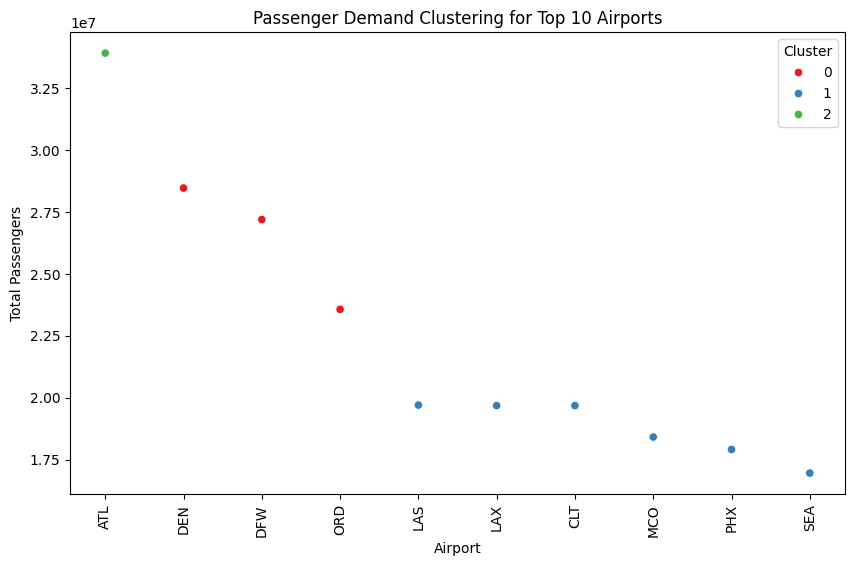

In [19]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Create a dataframe with total passenger counts for each airport
airport_demand = data_cleaned.groupby('ORIGIN')['PASSENGERS'].sum().reset_index()

#Sort the airports by total passengers in descending order and select the top 10
airport_demand_top10 = airport_demand.sort_values(by='PASSENGERS', ascending=False).head(10)

#Scale the data
scaler = StandardScaler()
airport_demand_scaled = scaler.fit_transform(airport_demand_top10[['PASSENGERS']])

#Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  #I thought 3 clusters would work.
airport_demand_top10['Cluster'] = kmeans.fit_predict(airport_demand_scaled)

#Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=airport_demand_top10, x='ORIGIN', y='PASSENGERS', hue='Cluster', palette='Set1')
plt.title('Passenger Demand Clustering for Top 10 Airports')
plt.xlabel('Airport')
plt.ylabel('Total Passengers')
plt.xticks(rotation=90)
plt.show()

In [20]:
import folium
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Airport locations for the top ten busiest airports
airport_locations = {
    'ATL': {'lat': 33.6407, 'lon': -84.4277},
    'DEN': {'lat': 39.8561, 'lon': -104.6737},
    'DFW': {'lat': 32.8998, 'lon': -97.0403},
    'ORD': {'lat': 41.9742, 'lon': -87.9073},
    'CLT': {'lat': 35.2140, 'lon': -80.9431},
    'LAS': {'lat': 36.0800, 'lon': -115.1522},
    'LAX': {'lat': 33.9416, 'lon': -118.4085},
    'MCO': {'lat': 28.4302, 'lon': -81.3080},
    'PHX': {'lat': 33.4342, 'lon': -112.0110},
    'SEA': {'lat': 47.4502, 'lon': -122.3088}
}

#dataframe with total passenger counts for each airport
airport_demand = data_cleaned.groupby('ORIGIN')['PASSENGERS'].sum().reset_index()

#Sort the airports by total passengers in descending order and select the top 10
airport_demand_top10 = airport_demand[airport_demand['ORIGIN'].isin(airport_locations.keys())].sort_values(by='PASSENGERS', ascending=False).head(10)

#Scale the data
scaler = StandardScaler()
airport_demand_scaled = scaler.fit_transform(airport_demand_top10[['PASSENGERS']])

#Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
airport_demand_top10['Cluster'] = kmeans.fit_predict(airport_demand_scaled)

#Create a map
map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

#Add markers
colors = ['blue', 'green', 'red']  #Color options for the 3 clusters
for index, row in airport_demand_top10.iterrows():
    airport = row['ORIGIN']
    cluster = row['Cluster']

    #Get the coordinates for the airport
    if airport in airport_locations:
        lat = airport_locations[airport]['lat']
        lon = airport_locations[airport]['lon']

        #Add marker with color-coded clusters
        folium.Marker(
            location=[lat, lon],
            popup=f"{airport}: {row['PASSENGERS']} passengers (Cluster {cluster+1})",
            icon=folium.Icon(color=colors[cluster], icon='info-sign')
        ).add_to(map)

#Show
map

In [21]:
#same as above but with DBSCAN
import folium
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.preprocessing import StandardScaler

airport_locations = {
    'ATL': {'lat': 33.6407, 'lon': -84.4277},
    'DEN': {'lat': 39.8561, 'lon': -104.6737},
    'DFW': {'lat': 32.8998, 'lon': -97.0403},
    'ORD': {'lat': 41.9742, 'lon': -87.9073},
    'CLT': {'lat': 35.2140, 'lon': -80.9431},
    'LAS': {'lat': 36.0800, 'lon': -115.1522},
    'LAX': {'lat': 33.9416, 'lon': -118.4085},
    'MCO': {'lat': 28.4302, 'lon': -81.3080},
    'PHX': {'lat': 33.4342, 'lon': -112.0110},
    'SEA': {'lat': 47.4502, 'lon': -122.3088}
}

airport_demand = data_cleaned.groupby('ORIGIN')['PASSENGERS'].sum().reset_index()

airport_demand_top10 = airport_demand[airport_demand['ORIGIN'].isin(airport_locations.keys())].sort_values(by='PASSENGERS', ascending=False).head(10)

scaler = StandardScaler()
airport_demand_scaled = scaler.fit_transform(airport_demand_top10[['PASSENGERS']])

#Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
airport_demand_top10['Cluster'] = dbscan.fit_predict(airport_demand_scaled)

#Create and show map
map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
colors = ['blue', 'green', 'red', 'gray']
for index, row in airport_demand_top10.iterrows():
    airport = row['ORIGIN']
    cluster = row['Cluster']
    if airport in airport_locations:
        lat = airport_locations[airport]['lat']
        lon = airport_locations[airport]['lon']
        cluster_color = colors[cluster] if cluster != -1 else 'gray'
        folium.Marker(
            location=[lat, lon],
            popup=f"{airport}: {row['PASSENGERS']} passengers (Cluster {cluster+1})",
            icon=folium.Icon(color=cluster_color, icon='info-sign')
        ).add_to(map)
map

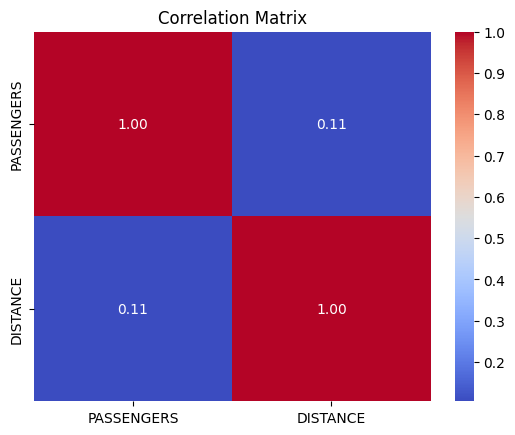

In [22]:
corr_matrix = data_cleaned[['PASSENGERS', 'DISTANCE']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Okay, previous two maps and this correlation matrix, I kinda got a little carried away with the clusterings. Still Fun stuff. Next, I wanna look at some of the airlines operating these flights. Lets see!

In [23]:
#Group by carrier name and total flights and total passengers
top_carriers = data_cleaned.groupby('CARRIER_NAME').agg(
    total_flights=('PASSENGERS', 'count'),
    total_passengers=('PASSENGERS', 'sum')
).reset_index()

#Sort by total passengers in descending order
top_carriers_sorted = top_carriers.sort_values(by='total_passengers', ascending=False)

#Select the top 10 carriers
top_ten_carriers = top_carriers_sorted.head(10)

#Display the top ten carriers
print("Top 10 Carriers by Total Passengers:")
print(top_ten_carriers)

Top 10 Carriers by Total Passengers:
               CARRIER_NAME  total_flights  total_passengers
95   Southwest Airlines Co.          25453       129407393.0
34     Delta Air Lines Inc.          10608       106133674.0
13   American Airlines Inc.           8670       103813508.0
111   United Air Lines Inc.          10765        78673659.0
99         Spirit Air Lines           4824        30598557.0
92    SkyWest Airlines Inc.          10761        29751206.0
10     Alaska Airlines Inc.           3443        24739002.0
45   Frontier Airlines Inc.           5478        23196240.0
61          JetBlue Airways           3646        21999690.0
12            Allegiant Air           8625        13010935.0


Wow, I thought Delta or United would be at the top, but did not expect Southwest. Interesting stuff indeed. The big three are beaten out by Southwest Airlines, who would've thought! Lets visualize them better on a graph.

In [24]:
import plotly.express as px

#Create a bar chart
fig = px.bar(
    top_ten_carriers,
    x='CARRIER_NAME',
    y='total_passengers',
    title='Top 10 Carriers by Total Passengers',
    labels={'total_passengers': 'Total Passengers', 'CARRIER_NAME': 'Carrier Name'},
    hover_data={'total_passengers': True, 'total_flights': True},
    text='total_passengers'
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    xaxis_title='Carrier Name',
    yaxis_title='Total Passengers',
    xaxis_tickangle=60,
    height=600,
    width=900
)
#Show
fig.show()

There we go, that's a bit better to look at! Hovering over them shows the passenger count and fligths. Epic stuff indeed!

In [25]:
print(data_cleaned.columns) #Another Sanity check

Index(['PASSENGERS', 'DISTANCE', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST',
       'DEST_CITY_NAME', 'CARRIER_NAME', 'YEAR', 'QUARTER', 'MONTH'],
      dtype='object')


In [26]:
#Group total passengers by year and quarter
passenger_per_quarter = data_cleaned.groupby(['YEAR', 'QUARTER'])['PASSENGERS'].sum().reset_index()

#Show
print(passenger_per_quarter)

   YEAR  QUARTER   PASSENGERS
0  2024        1  194720795.0
1  2024        2  224224382.0
2  2024        3  222280421.0


In [27]:
import plotly.express as px

#Create a new column for combined Year-Quarter
passenger_per_quarter['Year_Quarter'] = passenger_per_quarter['YEAR'].astype(str) + ' Q' + passenger_per_quarter['QUARTER'].astype(str)

#Plot the chart
fig = px.bar(passenger_per_quarter, x='Year_Quarter', y='PASSENGERS',
             title='Total Passengers per Quarter',
             labels={'Year_Quarter': 'Year and Quarter', 'PASSENGERS': 'Total Passengers'})
#Show
fig.show()

We can see clearly that the Summer and Fall seasons had way more passengers than the first few months of the year!

Now, I'll try to use **Prophet** to predict simple passenger forecast for the months of October, November and December based on the real data we have for the first nine months of the 2024 year:

In [28]:
#Create a datetime column
data_cleaned['date'] = pd.to_datetime(data_cleaned[['YEAR', 'MONTH']].assign(DAY=1))

In [29]:
#Grouping passengers by the date (month)
monthly_passenger_data = data_cleaned.groupby('date')['PASSENGERS'].sum().reset_index()

#Show
print(monthly_passenger_data.head())

        date  PASSENGERS
0 2024-01-01  60028591.0
1 2024-02-01  61205435.0
2 2024-03-01  73486769.0
3 2024-04-01  70802997.0
4 2024-05-01  76045284.0


In [30]:
#Use adfuller to find ADF stats and p-values
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_passenger_data['PASSENGERS'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.9826923836021417
p-value: 0.29421306397628927


In [48]:
#Import prophet and fit the model to our dataset
from prophet import Prophet

df_prophet = monthly_passenger_data.reset_index().rename(columns={'date': 'ds', 'PASSENGERS': 'y'})
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=3, freq='MS')  # monthly start
forecast = model.predict(future)

#Create a DataFrame with the date and forecasted values
forecast_output = forecast[['ds', 'yhat']].tail(3)

#Print the forecasted dataframe
print(forecast_output)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz5ntdd9b/2oawhcxo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz5ntdd9b/8mp0epu2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93611', 'data', 'file=/tmp/tmpz5ntdd9b/2oawhcxo.json', 'init=/tmp/tmpz5ntdd9b/8mp0epu2.json', 'output', 'file=/tmp/tmpz5ntdd9b/prophet_modelgoz6quyp/prophet_model-20250524060059.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:00:59 - cmdstanpy - INFO - Chain [1] start processing
IN

           ds          yhat
9  2024-10-01  7.894678e+07
10 2024-11-01  8.051167e+07
11 2024-12-01  8.202609e+07


In [49]:
import pandas as pd
import plotly.graph_objects as go

#Actual data
actual_df = monthly_passenger_data.reset_index().copy()
actual_df['Source'] = 'Actual'

#Forecasted data
forecast_df = pd.DataFrame({
    'date': pd.to_datetime(['2024-10-01', '2024-11-01', '2024-12-01']),
    'PASSENGERS': [78946780, 80511670, 82026090],
    'Source': 'Forecast'
})

#Combine into a single DataFrame
combined_df = pd.concat([actual_df, forecast_df], ignore_index=True)
print(combined_df)

         date  PASSENGERS    Source
0  2024-01-01  60028591.0    Actual
1  2024-02-01  61205435.0    Actual
2  2024-03-01  73486769.0    Actual
3  2024-04-01  70802997.0    Actual
4  2024-05-01  76045284.0    Actual
5  2024-06-01  77376101.0    Actual
6  2024-07-01  78968116.0    Actual
7  2024-08-01  75022736.0    Actual
8  2024-09-01  68289569.0    Actual
9  2024-10-01  78946780.0  Forecast
10 2024-11-01  80511670.0  Forecast
11 2024-12-01  82026090.0  Forecast


In [52]:
# Manual input because a the graph I wanted wasn't possible from the dataframe as I wanted different colors for the same line
data = {
    'date': pd.date_range('2024-01-01', periods=12, freq='MS'),
    'PASSENGERS': [
        60028591, 61205435, 73486769, 70802997, 76045284, 77376101,
        78968116, 75022736, 68289569, 78946780, 80511670, 82026090
    ],
    'Source': ['Actual'] * 9 + ['Forecast'] * 3
}

df = pd.DataFrame(data)
df['Month'] = df['date'].dt.strftime('%b')

#Plot actual (months 1–9)
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.iloc[:9]['Month'],
    y=df.iloc[:9]['PASSENGERS'],
    mode='lines+markers',
    name='Actual',
    line=dict(color='royalblue'),
    hovertemplate='Month: %{x}<br>Passengers: %{y:,.0f}<extra></extra>'
))

#Plot forecast (months 10–12)
fig.add_trace(go.Scatter(
    x=df.iloc[8:]['Month'],  #start from month 9, i.e September, to avoid a visual break
    y=df.iloc[8:]['PASSENGERS'],
    mode='lines+markers',
    name='Forecast',
    line=dict(color='orange'),
    hovertemplate='Month: %{x}<br>Passengers: %{y:,.0f}<extra></extra>'
))

fig.update_layout(
    title="2024 US Domestic Monthly Air Travel (Actual vs Forecast)",
    xaxis_title="Month",
    yaxis_title="Passengers",
    hovermode="x unified",
    template="plotly_white"
)

fig.show()

In [51]:
print(combined_df) #Sanity Check

         date  PASSENGERS    Source
0  2024-01-01  60028591.0    Actual
1  2024-02-01  61205435.0    Actual
2  2024-03-01  73486769.0    Actual
3  2024-04-01  70802997.0    Actual
4  2024-05-01  76045284.0    Actual
5  2024-06-01  77376101.0    Actual
6  2024-07-01  78968116.0    Actual
7  2024-08-01  75022736.0    Actual
8  2024-09-01  68289569.0    Actual
9  2024-10-01  78946780.0  Forecast
10 2024-11-01  80511670.0  Forecast
11 2024-12-01  82026090.0  Forecast


From the above graph, the predicted forecast is somewhat accurate. With the holidays rushing in, the line that dropped after summer travel rose up sharply in time for Halloween, Christmas, and New Year. This means that our model worked.

Update:
The actual statistics for Oct, Nov, Dec of 2024 are as below:
```
OCT: 73.1 Million
NOV: 67.7 Million
DEC: 78.03 Million
```
Well, the model was off, due to the small dataset (Only 9 months to go off of, perhaps adding 2023 data would help as it would have the data for Oct, Nov, and Dec of 2023 to learn from. Okay, updated tasks for the next phase of this project!)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
#Prophet predictions
forecast_values = [78.94678, 80.51167, 82.02609]  #Millions
#Actuals for Oct–Dec 2024
actual_values = [73.1, 67.7, 78.03]  #Millions

#Convert to Series
y_pred = pd.Series(forecast_values)
y_true = pd.Series(actual_values)

#Metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

#Output
print(f"MAE:  {mae:.2f} million")
print(f"RMSE: {rmse:.2f} million")
print(f"MAPE: {mape:.2f}%")

MAE:  7.55 million
RMSE: 8.45 million
MAPE: 10.68%


### Forecast Accuracy Evaluation (My Prophet Model)

To evaluate the accuracy of our Prophet model, I compared the predicted passenger counts for October–December 2024 with the actual observed values:

| Month | Forecast (Millions) | Actual (Millions) |
|-------|----------------------|--------------------|
| Oct   | 78.95                | 73.10              |
| Nov   | 80.51                | 67.70              |
| Dec   | 82.03                | 78.03              |

#### Accuracy Metrics:

- **MAE (Mean Absolute Error)**: *7.55 million passengers*  
  This tells us that, on average, Prophet's predictions were off by 7.55 million passengers.

- **RMSE (Root Mean Squared Error)**: *8.45 million passengers*  
  This metric penalizes larger errors more than MAE. A higher RMSE than MAE indicates some larger deviations.

- **MAPE (Mean Absolute Percentage Error)**: *10.68%*  
  This shows the average prediction error as a percentage of the actual values. A MAPE under 10% is generally considered acceptable for many forecasting tasks. Mine was a little over that.

#### Interpretation:
While the model captured the general trend, it overestimated demand in all three months, particularly in November. This suggests the model could benefit from incorporating external factors (e.g., holidays, economic trends) or using a more training data (Past Years) to adapt to changing patterns.

# **Thank you for looking through this notebook. Hope my curiosity piqued your interest as well!**